In [ ]:
!pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [ ]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



/usr/local/lib/python3.7/dist-packages/stable_baselines/__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


In [ ]:
pip install alpha_vantage

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries

In [ ]:
API_key = 'OFYE21323O0HHV4I'

In [ ]:
ts = TimeSeries(key = API_key,output_format='pandas')
data, meta = ts.get_intraday('MSFT', interval = '5min' , outputsize = 'full')

In [ ]:
df = data
df.dtypes

date         datetime64[ns]
1. open             float64
2. high             float64
3. low              float64
4. close            float64
5. volume           float64
dtype: object

In [ ]:
df.set_index('date', inplace=True)
df.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2022-02-18 20:00:00,285.78,285.8500,285.70,285.80,8385.0
2022-02-18 19:55:00,285.80,285.8500,285.80,285.85,2682.0
2022-02-18 19:50:00,285.80,285.8500,285.80,285.85,2008.0
2022-02-18 19:40:00,285.75,285.7500,285.75,285.75,1738.0
2022-02-18 19:35:00,285.80,285.8201,285.75,285.75,1585.0


In [ ]:
# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C
# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
#passing the data and creating our environment
env = gym.make('stocks-v0', frame_bound=(5,100), window_size=5)

In [ ]:
env.signal_features

array([[ 1.96946945e+02,  0.00000000e+00],
       [ 2.02382385e+02,  5.43544000e+00],
       [ 2.02982986e+02,  6.00601000e-01],
       [ 2.05405411e+02,  2.42242500e+00],
       [ 2.08823822e+02,  3.41841100e+00],
       [ 2.13493500e+02,  4.66967800e+00],
       [ 2.14414413e+02,  9.20913000e-01],
       [ 2.16041046e+02,  1.62663300e+00],
       [ 2.20360367e+02,  4.31932100e+00],
       [ 2.22382385e+02,  2.02201800e+00],
       [ 2.19604599e+02, -2.77778600e+00],
       [ 2.18028030e+02, -1.57656900e+00],
       [ 2.16516510e+02, -1.51152000e+00],
       [ 2.14714722e+02, -1.80178800e+00],
       [ 2.12632629e+02, -2.08209300e+00],
       [ 2.08593597e+02, -4.03903200e+00],
       [ 2.08208206e+02, -3.85391000e-01],
       [ 2.07787781e+02, -4.20425000e-01],
       [ 2.07237244e+02, -5.50537000e-01],
       [ 2.10255249e+02,  3.01800500e+00],
       [ 2.03878876e+02, -6.37637300e+00],
       [ 2.03043045e+02, -8.35831000e-01],
       [ 2.04849854e+02,  1.80680900e+00],
       [ 2.

In [ ]:
env.action_space

Discrete(2)

info {'total_reward': 11.491531999999978, 'total_profit': 0.7273767463315592, 'position': 0}


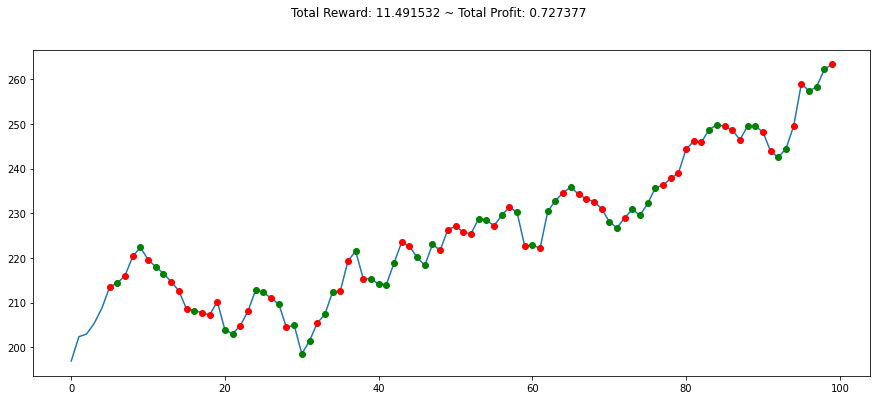

In [ ]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [ ]:
env_maker = lambda: gym.make('stocks-v0',  frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [ ]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=10000)

---------------------------------
| explained_variance | -0.909   |
| fps                | 21       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 7.41     |
---------------------------------
---------------------------------
| explained_variance | -23.4    |
| fps                | 381      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.000359 |
---------------------------------
---------------------------------
| explained_variance | -0.0101  |
| fps                | 406      |
| nupdates           | 200      |
| policy_entropy     | 0.693    |
| total_timesteps    | 1000     |
| value_loss         | 3.52     |
---------------------------------
---------------------------------
| explained_variance | -0.00474 |
| fps                | 411      |
| nupdates           | 300      |
| policy_entropy     | 0.693    |
| total_timest

In [ ]:
env = gym.make('stocks-v0', frame_bound=(90,110), window_size=5)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 4.104111000000046, 'total_profit': 0.9723945651271646, 'position': 1}


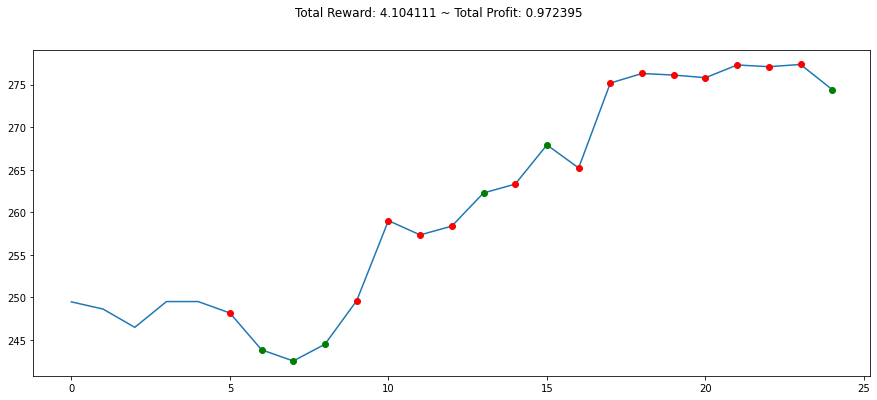

In [ ]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

As we can see, our agent RL bought and sold stocks at random. Our profit margin appears to be greater than 1, so we can determine that our bot has made us profit from the trades it has made. But these were random steps, now let’s properly train our model to get better trades.